In [3]:
%matplotlib inline
import altair as alt
import pandas as pd
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [15]:
df = pd.read_csv('abalone.data', names=['Sex','Length','Diameter','Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

In [6]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

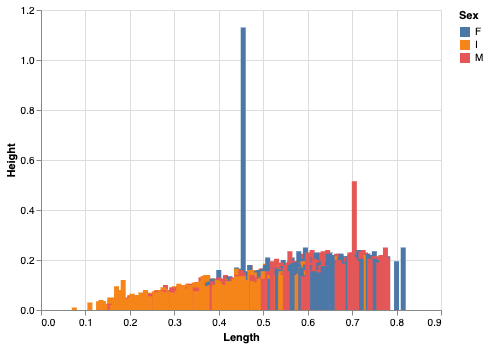

In [10]:
alt.Chart(df).mark_bar().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex'
)



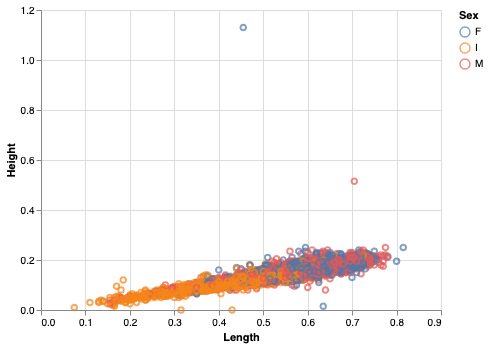

In [9]:
alt.Chart(df).mark_point().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex'
)

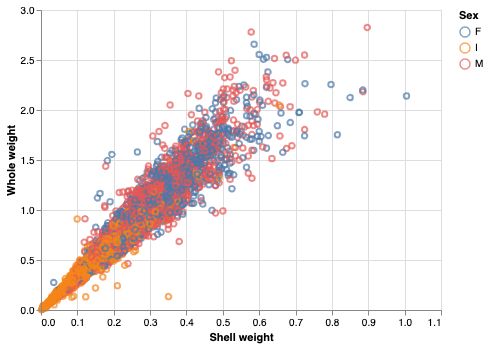

In [16]:
alt.Chart(df).mark_point().encode(
    x='Shell weight:Q',
    y='Whole weight:Q',
    color='Sex'
)

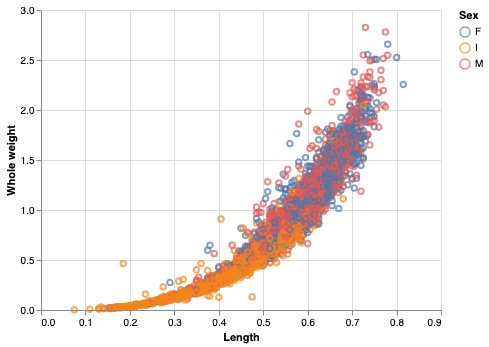

In [17]:
alt.Chart(df).mark_point().encode(
    x='Length:Q',
    y='Whole weight:Q',
    color='Sex'
)

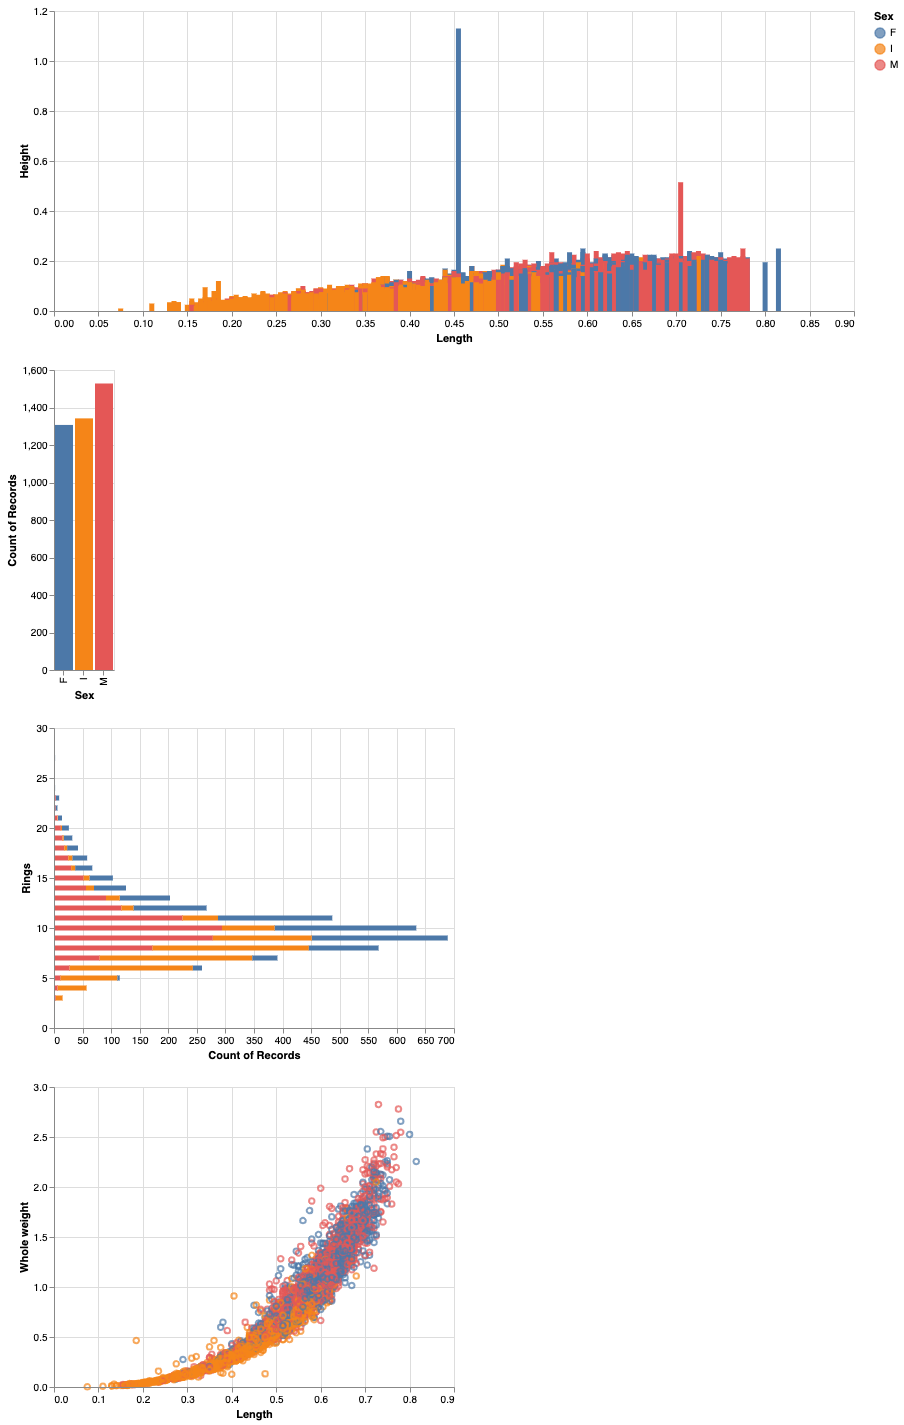

In [25]:
brush = alt.selection(type='interval')

# the top scatterplot
mainBar = alt.Chart().mark_bar().encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
            y='count()',
            color='Sex',
            x='Sex:N'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

bars2 = alt.Chart().mark_bar().encode(
            y='Rings:Q',
            color='Sex:N',
            x='count()'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter = alt.Chart(df).mark_point().encode(
                x='Length:Q',
                y='Whole weight:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

chart = alt.vconcat(mainBar, bars, bars2, scatter, data=df)
chart

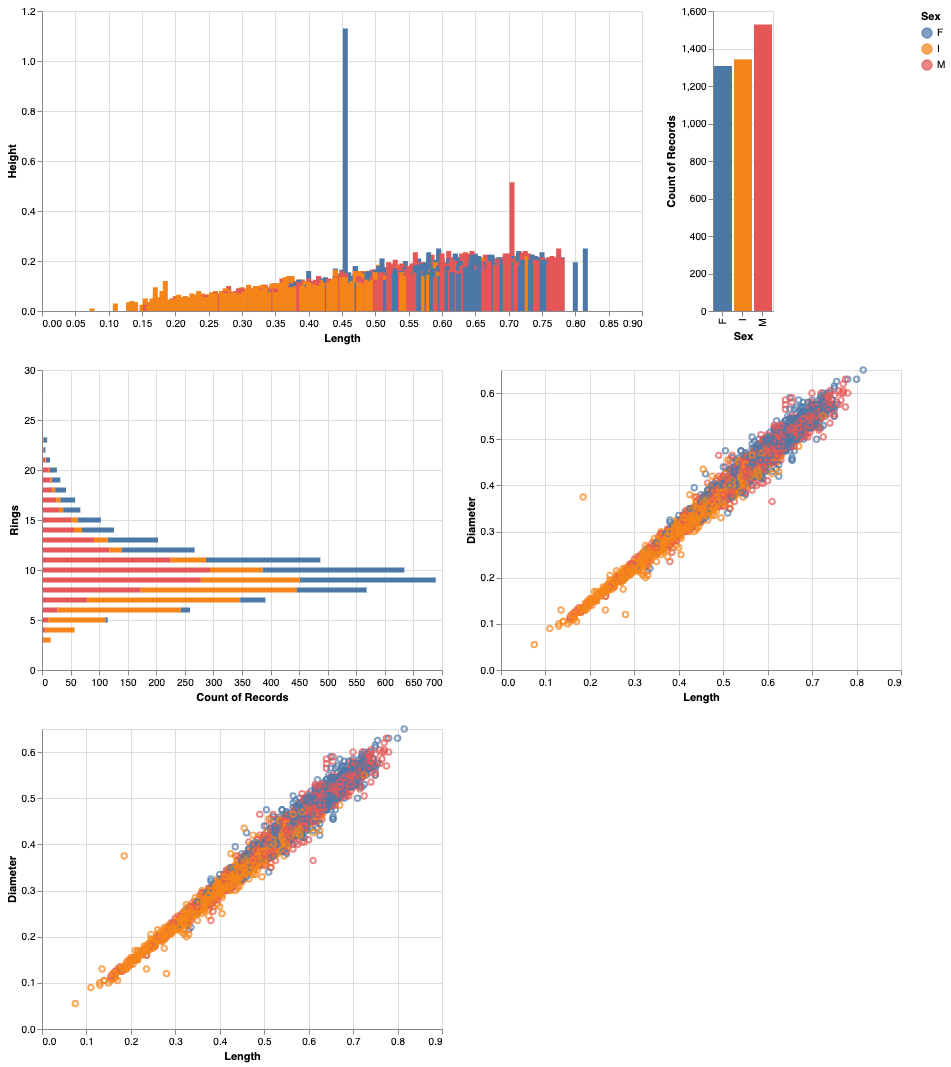

In [37]:


brush = alt.selection_interval(encodings=['x'])

# the top scatterplot
mainBar = alt.Chart().mark_bar().encode(
    x='Length:Q',
    y='Height:Q',
    color=alt.condition(brush, 'Sex:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=600
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
            y='count()',
            color='Sex',
            x='Sex:N'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

bars2 = alt.Chart().mark_bar().encode(
            y='Rings:Q',
            color='Sex:N',
            x='count()'
        ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter = alt.Chart(df).mark_point().encode(
                x='Length:Q',
                y='Whole weight:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter = alt.Chart(df).mark_point().encode(
                x='Length:Q',
                y='Diameter:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

scatter2 = alt.Chart(df).mark_point().encode(
                x='Length:Q',
                y='Diameter:Q',
                color='Sex'
            ).transform_filter(
            brush.ref() # the filter transform uses the selection
                        # to filter the input data to this chart
        )

chart = alt.vconcat(mainBar | bars, bars2 | scatter ,scatter2, data=df)
chart

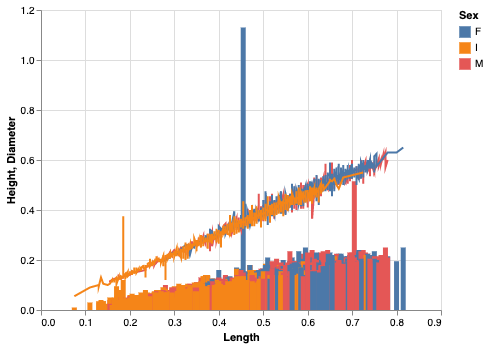

In [43]:
mainBar = alt.Chart(df).mark_bar().encode(
    x='Length:Q',
    y='Height:Q',
    color='Sex:N',
)

chart2 = alt.Chart(df).mark_line().encode(
            y='Diameter:Q',
            color='Sex',
            x='Length:Q'
        )

(mainBar + chart2)